In this notebook we use GCN to analyze the POIs networks

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
import random
import csv
import os
import sys
import random

In [4]:
random.seed(10)

In [5]:
df = pd.read_csv('./datasets/la_label.csv')

In [6]:
df.tail(10)

,Unnamed: 0,Label (Grouping),Unemployment Rate,"Agriculture, forestry, fishing and hunting, and mining",Construction,Manufacturing,Wholesale trade,Retail trade,"Transportation and warehousing, and utilities",Information,...,typology_y,typ_cat_y,label_y,USPS,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
1727,1727,9203.36,0.07,0.00,0.07,0.08,0.01,0.09,0.06,0.02,...,1.0,['LISD'],0.0,CA,1656822,967,0.640,0.000,34.385597,-118.535884
1728,1728,9203.37,0.08,0.00,0.11,0.14,0.01,0.11,0.04,0.04,...,6.0,['SMMI'],0.0,CA,1648101,0,0.636,0.000,34.373662,-118.512874
1729,1729,9203.38,0.09,0.00,0.03,0.09,0.04,0.09,0.03,0.09,...,9.0,['SAE'],0.0,CA,3715461,0,1.435,0.000,34.386084,-118.596430
1730,1730,9203.39,0.05,0.01,0.04,0.13,0.03,0.10,0.02,0.07,...,9.0,['SAE'],0.0,CA,33718926,228821,13.019,0.088,34.415357,-118.612172
1731,1731,9303.01,0.00,0.00,0.10,0.08,0.11,0.13,0.00,0.00,...,6.0,['SMMI'],0.0,CA,1028565621,4125839,397.131,1.593,34.280333,-117.866141
1732,1732,9800.15,0.12,0.00,0.13,0.07,0.02,0.08,0.05,0.00,...,1.0,['LISD'],0.0,CA,5188936,220674,2.003,0.085,33.773247,-118.288839
1733,1733,9800.19,0.09,0.00,0.00,0.00,0.10,0.05,0.11,0.05,...,9.0,['SAE'],0.0,CA,44210349,31076,17.070,0.012,34.092567,-118.534363
1734,1734,9800.21,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,2.0,['OD'],0.0,CA,6380469,565373,2.464,0.218,34.270047,-118.381334
1735,1735,9800.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.0,['ARE'],0.0,CA,12492183,13434637,4.823,5.187,33.739090,-118.258539
1736,1736,9901.00,-,-,-,-,-,-,-,-,...,3.0,['ARG'],1.0,CA,5606686,1665633,2.165,0.643,32.685362,-117.245574


In [7]:
df.columns

Index(['Unnamed: 0', 'Label (Grouping)', 'Unemployment Rate',
       'Agriculture, forestry, fishing and hunting, and mining',
       'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade',
       'Transportation and warehousing, and utilities', 'Information',
       'Finance and insurance, and real estate and rental and leasing',
       'Professional, scientific, and management, and administrative and waste management services',
       'Educational services, and health care and social assistance',
       'Arts, entertainment, and recreation, and accommodation and food services',
       'Other services, except public administration', 'Public administration',
       'INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS) Less than $10,000',
       'HEALTH INSURANCE COVERAGE With health insurance coverage',
       'HEALTH INSURANCE COVERAGE With private health insurance',
       'YEAR STRUCTURE BUILT Built 2014 or later',
       'YEAR STRUCTURE BUILT Built 2010 to 2013',
  

In [8]:
ids = df['GEOID']
labels = df['label_y']
lats = df['INTPTLAT']
longs = df['INTPTLONG                                                                                                                             ']

In [9]:
la_lat_n = 34.746448
la_lat_s = 33.4
la_long_w = -118.861046
la_long_e = -117.015579

In [10]:
tracts = pd.DataFrame(list(zip(ids, lats, longs, labels)))
tracts.columns = ['id', 'lat', 'long', 'label']

In [11]:
tracts.describe()

,id,lat,long,label
count,1.737000e+03,1737.000000,1737.000000,1737.000000
mean,6.037900e+09,34.055732,-118.234390,0.157168
std,4.106899e+06,0.242663,0.240820,0.364063
min,6.037101e+09,32.683618,-118.861046,0.000000
25%,6.037211e+09,33.954281,-118.385506,0.000000
50%,6.037408e+09,34.055860,-118.265898,0.000000
75%,6.037570e+09,34.160209,-118.124438,0.000000
max,6.073010e+09,34.746448,-117.015579,1.000000


In [12]:
tracts.tail(10)

,id,lat,long,label
1727,6.037920e+09,34.385597,-118.535884,0.0
1728,6.037920e+09,34.373662,-118.512874,0.0
1729,6.037920e+09,34.386084,-118.596430,0.0
1730,6.037920e+09,34.415357,-118.612172,0.0
1731,6.037930e+09,34.280333,-117.866141,0.0
1732,6.037980e+09,33.773247,-118.288839,0.0
1733,6.037980e+09,34.092567,-118.534363,0.0
1734,6.037980e+09,34.270047,-118.381334,0.0
1735,6.037980e+09,33.739090,-118.258539,0.0
1736,6.073010e+09,32.685362,-117.245574,1.0


In [13]:
for index, row in tracts.iterrows():
    if (row['lat'] > la_lat_n or row['lat'] < la_lat_s or
            row['long'] > la_long_e or row['long'] < la_long_w):
        tracts = tracts.drop([index])

In [14]:
city_graph = nx.Graph()
color_map = []
for index, row in tracts.iterrows():
    city_graph.add_node((row['long'], row['lat']),
                        pos=(row['long'], row['lat']),
                        label=row['label'])
    if row['label'] == 1:
        color_map.append('steelblue')
    else:
        color_map.append('lightblue')

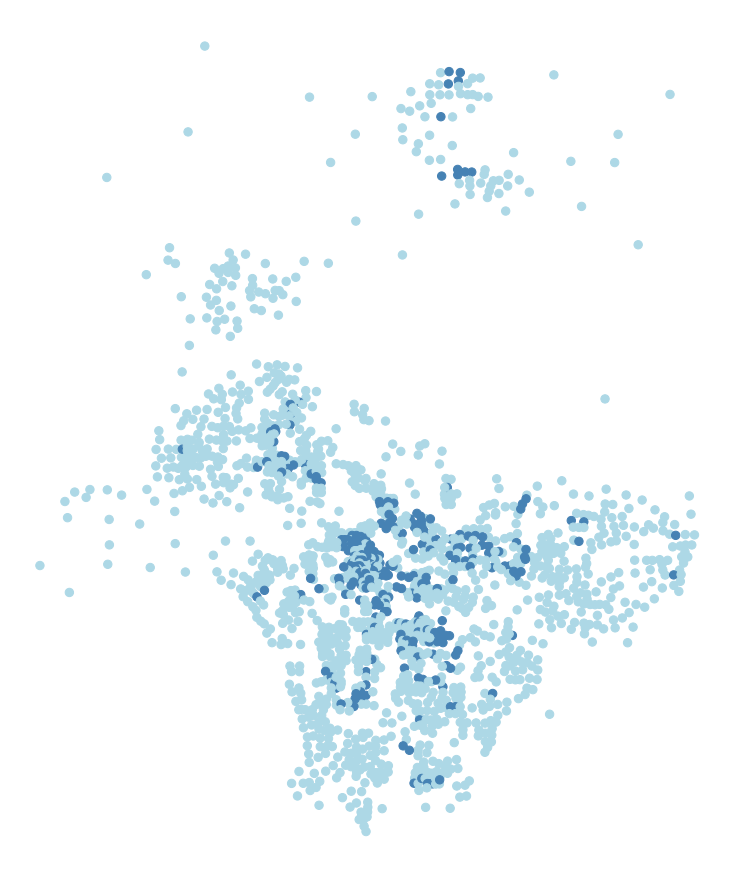

In [15]:
plt.figure(figsize=(10, 12))

pos=nx.get_node_attributes(city_graph,'pos')
nx.draw(city_graph, pos=pos,
        node_color=color_map, 
        with_labels=False,
        node_size=70)

In [16]:
def get_distance(p1, p2):
    dist = math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
    return dist

In [17]:
hospital_locations = pd.read_csv('./datasets/la_hospitals.csv')
hospital_x = hospital_locations

In [18]:
hospitals_x = hospital_locations['X']
hospitals_y = hospital_locations['Y']

hospitals = []
for n_long, n_lat in list(zip(hospitals_x, hospitals_y)):
    if (n_lat<=la_lat_n and n_lat>=la_lat_s and
            n_long<=la_long_e and n_long>=la_long_w):
        hospitals.append([n_long, n_lat, 0])

In [19]:
min(hospitals_y)

33.3391852280922

In [20]:
for i, hospital in enumerate(hospitals):
    closest_distance = 1000000
    for index, row in tracts.iterrows():
        dist = get_distance((row['long'], row['lat']),
                            (hospital[0], hospital[1]))
        if dist < closest_distance:
            closest_distance = dist
            label = row['label']
    hospitals[i][2] = int(label)

In [21]:
for i, values in enumerate(hospitals):
    n_long, n_lat, n_label = values
    city_graph.add_node(i, pos=(n_long, n_lat))
    color_map.append('coral')

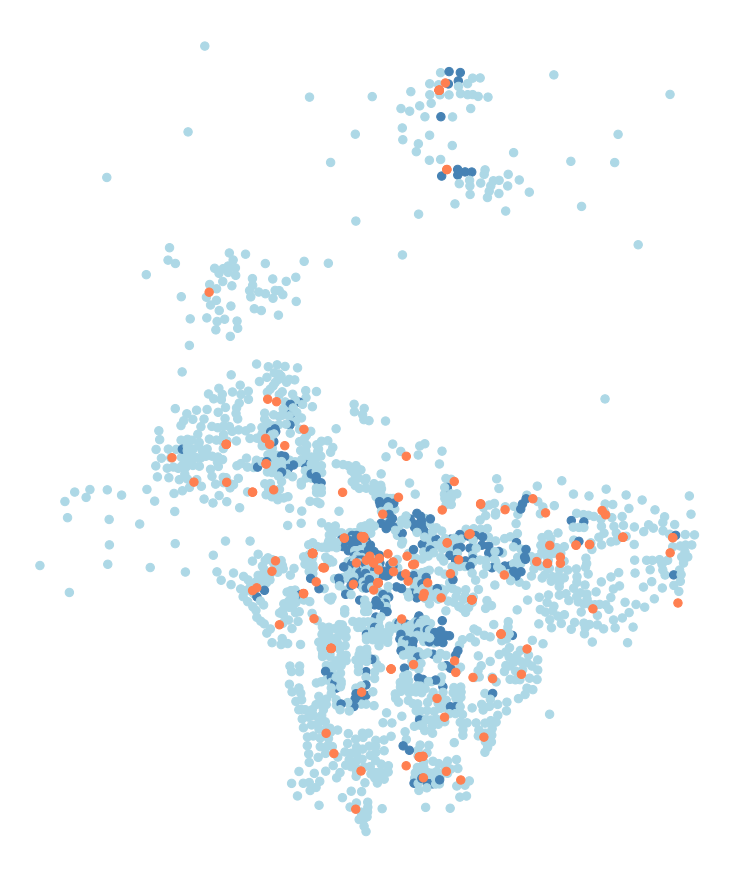

In [22]:
plt.figure(figsize=(10, 12))

pos=nx.get_node_attributes(city_graph,'pos')
nx.draw(city_graph, pos=pos,
        node_color=color_map, 
        with_labels=False,
        node_size=70)

In [23]:
subway_locations = pd.read_csv('./datasets/la_subway.csv')
subway_x = subway_locations['X']
subway_y = subway_locations['Y']

subway = []
for n_long, n_lat in list(zip(subway_x, subway_y)):
    if (n_lat<=la_lat_n and n_lat>=la_lat_s and
            n_long<=la_long_e and n_long>=la_long_w):
        subway.append([n_long, n_lat, 0])

In [24]:
for i, s in enumerate(subway):
    closest_distance = 1000000
    for index, row in tracts.iterrows():
        dist = get_distance((row['long'], row['lat']),
                            (s[0], s[1]))
        if dist < closest_distance:
            closest_distance = dist
            label = row['label']
    subway[i][2] = int(label)

In [25]:
school_locations = pd.read_csv('./datasets/la_schools.csv')
schools_x = school_locations['X']
schools_y = school_locations['Y']

schools = []
for n_long, n_lat in list(zip(schools_x, schools_y)):
    if (n_lat<=la_lat_n and n_lat>=la_lat_s and
            n_long<=la_long_e and n_long>=la_long_w):
        schools.append([n_long, n_lat, 0])

In [26]:
for i, s in enumerate(schools):
    closest_distance = 1000000
    for index, row in tracts.iterrows():
        dist = get_distance((row['long'], row['lat']),
                            (s[0], s[1]))
        if dist < closest_distance:
            closest_distance = dist
            label = row['label']
    schools[i][2] = int(label)

In [27]:
tract_lats = tracts['lat'].tolist()
tract_longs = tracts['long'].tolist()
tract_labels = tracts['label'].tolist()

In [28]:
# Remove the components you are interested in seeing
all_nodes = list(zip(tract_longs, tract_lats, tract_labels)) + hospitals + subway + schools

In [29]:
tract_indices = list(range(0, len(tracts)))
all_indices = list(range(0, len(all_nodes)))
hospital_indices = list(range(len(tracts), len(tracts) + len(hospitals)))
subway_indices = list(range(len(tracts) + len(hospitals), len(tracts) + len(hospitals) + len(subway)))
school_indices = list(range(len(tracts) + len(hospitals) + len(subway), len(tracts) + len(hospitals) + len(subway) + len(schools)))

In [30]:
len(hospitals), len(hospital_indices)

(164, 164)

In [31]:
# Creating a graph using NetworkX

# Adding nodes
city_graph = nx.Graph()
color_map = []
for i, values in enumerate(all_nodes):
    n_long, n_lat, n_label = values

    city_graph.add_node(i, pos=(n_long, n_lat))

    if n_label == 1:
        color_map.append('steelblue')
    else:
        color_map.append('lightblue')

# Adding edges
# Each node is directly connected to its closest four neighbors
for i in all_indices:
    proximity_dict = {}
    for j in all_indices:
        if i != j:
            proximity_dict[j] = get_distance((all_nodes[i][0], all_nodes[i][1]),
                                             (all_nodes[j][0], all_nodes[j][1]))
    
    closest4 = sorted(proximity_dict, key=proximity_dict.get, reverse=False)[0:4]
    
    for neighbor in closest4:
        s_lat = all_nodes[neighbor][1]
        s_long = all_nodes[neighbor][0]
        distance = get_distance((all_nodes[i][0], all_nodes[i][1]),
                                (s_long, s_lat))
        city_graph.add_edge(i, neighbor, weight=distance)


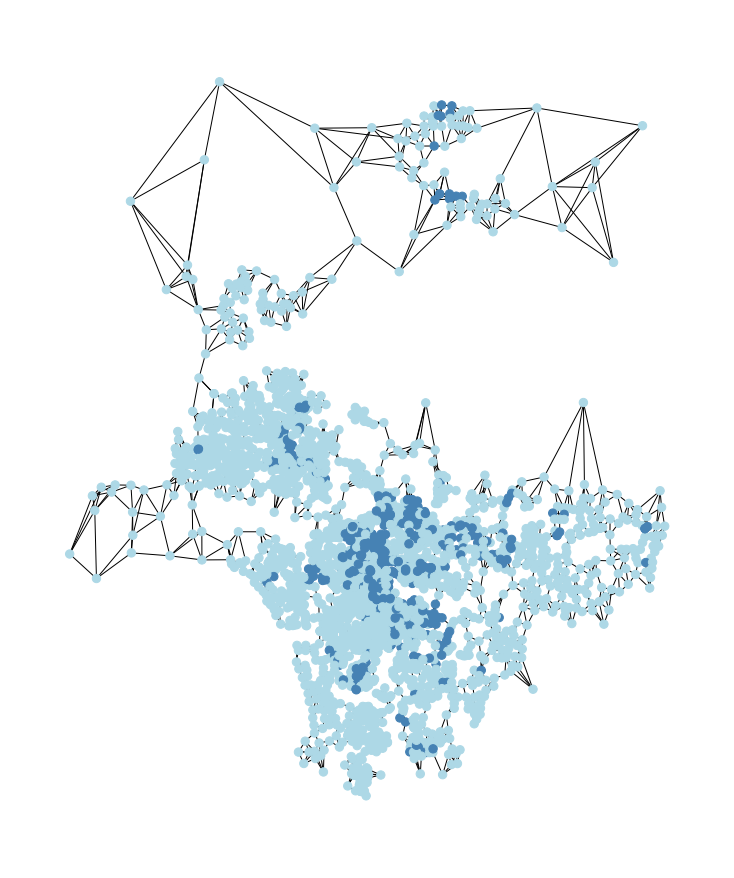

In [32]:
plt.figure(figsize=(10, 12))

pos=nx.get_node_attributes(city_graph,'pos')
nx.draw(city_graph, pos=pos,
        node_color=color_map, 
        with_labels=False,
        node_size=70)

In [33]:
tracts

,id,lat,long,label
0,6.037101e+09,34.259474,-118.292987,0.0
1,6.037101e+09,34.267721,-118.290147,0.0
2,6.037101e+09,34.252972,-118.290731,0.0
3,6.037101e+09,34.251608,-118.281633,0.0
4,6.037102e+09,34.225079,-118.354188,0.0
...,...,...,...,...
1731,6.037930e+09,34.280333,-117.866141,0.0
1732,6.037980e+09,33.773247,-118.288839,0.0
1733,6.037980e+09,34.092567,-118.534363,0.0
1734,6.037980e+09,34.270047,-118.381334,0.0


In [34]:
nx.shortest_path_length(city_graph, source=tract_indices[10], target=hospital_indices[10])

23

In [ ]:
hospital_paths = {}

for tract in tract_indices:
    hospitals_dict = {}
    for hospital in hospital_indices:
        if nx.has_path(city_graph, source=tract, target=hospital):
            hospitals_dict[hospital] = nx.shortest_path_length(city_graph,
                                                               source=tract,
                                                               target=hospital)
        else:
            hospitals_dict[hospital] = 100000
        
    closest2 = sorted(hospitals_dict, key=hospitals_dict.get, reverse=False)[0:2]

    hospital_paths[tract] = {"id":tracts.iloc[tract]['id'], "hospital_1":hospitals_dict[closest2[0]], "hospital_2":hospitals_dict[closest2[1]]}

In [ ]:
pd.DataFrame(hospital_paths).T

In [ ]:
subway_paths = {}

for tract in tract_indices:
    subway_dict = {}
    for subway in subway_indices:
        if nx.has_path(city_graph, source=tract, target=subway):
            subway_dict[subway] = nx.shortest_path_length(city_graph,
                                                          source=tract,
                                                          target=subway)
        else:
            subway_dict[subway] = 100000
        
    closest2 = sorted(subway_dict, key=subway_dict.get, reverse=False)[0:2]

    subway_paths[tract] = {"subway_1":subway_dict[closest2[0]], "subway_2":subway_dict[closest2[1]]}

In [ ]:
pd.DataFrame(subway_paths).T

In [ ]:
school_paths = {}

for tract in tract_indices:
    schools_dict = {}
    for school in school_indices:
        if nx.has_path(city_graph, source=tract, target=school):
            schools_dict[school] = nx.shortest_path_length(city_graph,
                                                           source=tract,
                                                           target=school)
        else:
            schools_dict[school] = 100000
        
    closest2 = sorted(schools_dict, key=schools_dict.get, reverse=False)[0:2]

    school_paths[tract] = {"school_1":schools_dict[closest2[0]], "school_2":schools_dict[closest2[1]]}

In [ ]:
pd.DataFrame(school_paths).T

In [ ]:
hospitals_df = pd.DataFrame(hospital_paths).T
subway_df = pd.DataFrame(subway_paths).T
schools_df = pd.DataFrame(school_paths).T

In [ ]:
poi_df = hospitals_df.join(subway_df).join(schools_df)

In [ ]:
poi_df

In [ ]:
poi_df.to_csv("./datasets/la_shortest_paths.csv", encoding='utf-8', index=False)